In [160]:
# importing libraries
from bs4 import BeautifulSoup
from urllib.request import urlopen ,Request
import requests
import numpy as np
import pandas as pd

# Approach 1

In [2]:
#Loop to go over pages
pages = np.arange(1, 11, 1) # to get 200 reviews
scraped_makaan=[]


for page in pages:
    page="https://www.makaan.com/kolkata-residential-property/buy-property-in-kolkata-city?page=" + str(page)
    r = Request(page, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(r).read().decode('utf-8')
    f = requests.get(page)
    soup= BeautifulSoup(response,'html')
    my_table = soup.find_all(name = 'li', attrs = {'class': 'cardholder'})

    for i in my_table:
      title = i.find_all(name = 'div', attrs = {'class': 'title-line'})

      if len(title) > 0:  #for nan value
        title = title[0].get_text()
      
      location = i.find_all(name = 'div', attrs = {'class': 'locWrap'})
      if len(location) > 0:
        location = location[0].get_text()
      
      price = i.find_all(name = 'td', attrs = {'class': 'price'})
      if len(price) > 0:
        price = price[0].get_text()
        price= price.replace(',','')
        
      size = i.find_all(name = 'td', attrs = {'class': 'size'})
      if len(size) > 0:
        size = size[0].get_text()
      
      status = i.find_all(name = 'td', attrs = {'class': 'val'})
      if len(status) > 0:
        status = status[0].get_text()
        
      rate = i.find_all(name = 'td', attrs = {'class': 'lbl rate'})
      if len(rate) > 0:
        rate = rate[0].get_text()
        
      listing = i.find_all(name = 'ul', attrs = {'class': 'listing-details'})
      if len(listing) > 0:
        listing = listing[0].get_text()
      
      real_estate= str(title)+' '+str(location)+' '+str(price)+ ' '+str(size)+ ' '+str(rate)+' '+str(status) #+ ' '+ str(listing) # can be changed ' ' to ',' 
      #print(real_estate)
      scraped_makaan.append(real_estate)


In [3]:
scraped_makaan

['2 BHK Apartment New Barrakpur, Kolkata  21.25 L 850  2,500 / sq ft Ready to move',
 '3 BHK Villa in Rajat Southern Vista Sonarpur, Kolkata  74 L 1408  5,255 / sq ft Under Construction',
 '2 BHK Apartment in Loharuka Urban Greens Phase II A Rajarhat, Kolkata  62.48 L 775  8,062 / sq ft Under Construction',
 '2 BHK Independent House in Fortune Fortune Township Barasat, Kolkata  43.99 L 1444  3,047 / sq ft Ready to move',
 '3 BHK Apartment in Salarpuria Amarana Residences Tangra, Kolkata  71.51 L 1337  5,348 / sq ft Under Construction',
 '3 BHK Apartment in Sugam Habitat Picnic Garden, Kolkata  72.37 L 1304  5,550 / sq ft Under Construction',
 '2 BHK Apartment in Eden City Group Eden City Maheshtala Maheshtala, Kolkata  23.9 L 771  3,100 / sq ft Under Construction',
 '2 BHK Villa in Gems Gems Bougainvillas Joka, Kolkata  55 L 1078  5,102 / sq ft Under Construction',
 '3 BHK Apartment in Kosmic North Grande Dum Dum, Kolkata  51.16 L 1312  3,900 / sq ft Under Construction',
 '3 BHK Apartm

In [ ]:
len(scraped_makaan)

200

# Approach 2

Improving the code block for individual information fetching instead of a long string

In [140]:
#Loop to go over pages
pages = np.arange(1, 2, 1) # to get 200 reviews

BHK = {'BHK':[]}
LOCALITY = {'Locality' : []}
PRICE = {'Price' : []}
UNIT= {'Price_unit': []}
SIZE= {'Area_sqft' : []}
STATUS= {'Status' : []}
RATE= {'Rate' : []}
LISTING= {'Listing' : []}


for page in pages:
    page="https://www.makaan.com/kolkata-residential-property/buy-property-in-kolkata-city?page=" + str(page)
    r = Request(page, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(r).read().decode('utf-8')
    f = requests.get(page)
    soup= BeautifulSoup(response,'html')
    my_table = soup.find_all(name = 'li', attrs = {'class': 'cardholder'})

    for i in my_table:
      
      bhk = i.find(name='span', attrs = {'class': 'val'})
      if len(bhk) > 0:
        bhk = int(str(bhk.get_text()))
      BHK['BHK'].append(bhk)
      
      
      locality = i.find_all(name = 'span', attrs = {'itemprop': 'addressLocality'})
      if len(locality) > 0:
        locality = locality[0].get_text()
      LOCALITY['Locality'].append(locality)
      
      
      price = i.find_all(name = 'span', attrs = {'itemprop': 'offers'})
      if len(price) > 0:
        price = float(str(price[0].get_text()))  #float(str()) to remove '' in every non string price values
      PRICE['Price'].append(price)
      
      
      unit = i.find_all(name = 'span', attrs = {'class': 'unit'})
      if len(unit) > 0:
        unit = unit[0].get_text()
      UNIT['Price_unit'].append(unit)
      
      
      size = i.find_all(name = 'td', attrs = {'class': 'size'})
      if len(size) > 0:
        size = int(str(size[0].get_text()))
      SIZE['Area_sqft'].append(size)


      status = i.find_all(name = 'td', attrs = {'class': 'val'})
      if len(status) > 0:
        status = status[0].get_text()
      STATUS['Status'].append(status)

      rate = i.find_all(name = 'td', attrs = {'class': 'lbl rate'})
      if len(rate) > 0:
        rate = rate[0].get_text()
        rate= rate.replace(',','')
        int_rate= [int(s) for s in rate.split() if s.isdigit()]
        res = int(str(int_rate)[1:-1])  # Remove square brackets from list using str() + list slicing
      RATE['Rate'].append(res)

      listing = i.find_all(name = 'ul', attrs = {'class': 'listing-details'})
      if len(listing) > 0:
        listing = listing[0].get_text()
      LISTING['Listing'].append(listing)


In [141]:
BHK

{'BHK': [2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 4, 3, 3, 2, 2, 3, 2, 9]}

In [114]:
SIZE

{'Area_sqft': [850,
  1408,
  775,
  1444,
  1337,
  1304,
  771,
  1078,
  1312,
  1043,
  1573,
  608,
  2406,
  1141,
  1189,
  1059,
  736,
  934,
  1200,
  6500]}

# Approach 3

Making dataframe with individual information to get a comprehensive picture of the real estate plots in Kolkata

In [297]:
#Loop to go over pages
pages = np.arange(1, (int(input('Scrape till page no: '))+1), 1) # to get custom number of  reviews , user input no. of pages ,+1 as python considers 0th value as 1
BHK = []  #creating empty list for appending values
LOCALITY = []
PRICE = []
UNIT = []
SIZE = []
STATUS = []
RATE = []
LISTING = []


for page in pages:
    page="https://www.makaan.com/kolkata-residential-property/buy-property-in-kolkata-city?page=" + str(page)
    r = Request(page, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(r).read().decode('utf-8')
    f = requests.get(page)
    soup= BeautifulSoup(response,'html')
    my_table = soup.find_all(name = 'li', attrs = {'class': 'cardholder'})



    for i in my_table:
      
      bhk = i.find(name = 'span', attrs = {'class': 'val'})
      if len(bhk) > 0:
        bhk = float(str(bhk.get_text()))  #float(str()) to remove '' in every non string BHK values
      BHK.append(bhk)
      
      
      locality = i.find_all(name = 'span', attrs = {'itemprop': 'addressLocality'})
      if len(locality) > 0:
        locality = locality[0].get_text()
      LOCALITY.append(locality)
      
      
      price = i.find(name = 'span', attrs = {'itemprop': 'offers'})
      if len(price) > 0:
        price = float(str(price.get_text()))  #float(str()) to remove '' in every non string price values
      PRICE.append(price)
      
      
      unit = i.find_all(name = 'span', attrs = {'class': 'unit'})
      if len(unit) > 0:
        unit = unit[0].get_text()
      UNIT.append(unit)
      
      
      size = i.find_all(name = 'td', attrs = {'class': 'size'})
      if len(size) > 0:
        size = int(str(size[0].get_text()))
      SIZE.append(size)


      status = i.find_all(name = 'td', attrs = {'class': 'val'})
      if len(status) > 0:
        status = status[0].get_text()
      STATUS.append(status)

      
      rate = i.find_all(name = 'td', attrs = {'class': 'lbl rate'})
      if len(rate) > 0:
        rate = rate[0].get_text()
        rate= rate.replace(',','')
        int_rate= [int(s) for s in rate.split() if s.isdigit()]
        res = int(str(int_rate)[1:-1])  # Remove square brackets from list using str() + list slicing
      RATE.append(res)


      listing = i.find_all(name = 'ul', attrs = {'class': 'listing-details'})
      if len(listing) > 0:
        listing = listing[0].get_text()
      LISTING.append(listing)


df = pd.DataFrame({'BHK' :BHK, 'Locality' :LOCALITY , 'Price' :PRICE, 'Price_unit' :UNIT ,
                   'Area_sqft':SIZE,'Rate':RATE,  'Status':STATUS })

df

Scrape till page no: 50


,BHK,Locality,Price,Price_unit,Area_sqft,Rate,Status
0,2.0,New Barrakpur,21.25,L,850,2500,Ready to move
1,3.0,Sonarpur,74.00,L,1408,5255,Under Construction
2,2.0,Rajarhat,62.48,L,775,8062,Under Construction
3,2.0,Barasat,43.99,L,1444,3047,Ready to move
4,3.0,Tangra,71.51,L,1337,5348,Under Construction
...,...,...,...,...,...,...,...
995,2.0,Garia,24.00,L,720,3333,Ready to move
996,2.0,Garia,24.00,L,720,3333,Ready to move
997,2.0,Garia,25.00,L,720,3472,Ready to move
998,2.0,Garia,25.00,L,720,3472,Ready to move


# EDA & Data Wrangling

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BHK         1000 non-null   float64
 1   Locality    1000 non-null   object 
 2   Price       1000 non-null   float64
 3   Price_unit  1000 non-null   object 
 4   Area_sqft   1000 non-null   int64  
 5   Rate        1000 non-null   int64  
 6   Status      1000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [315]:
df1=df.copy(deep= True) #copying the dataframe safeguarding from accidental changes

In [316]:
df1

,BHK,Locality,Price,Price_unit,Area_sqft,Rate,Status
0,2.0,New Barrakpur,21.25,L,850,2500,Ready to move
1,3.0,Sonarpur,74.00,L,1408,5255,Under Construction
2,2.0,Rajarhat,62.48,L,775,8062,Under Construction
3,2.0,Barasat,43.99,L,1444,3047,Ready to move
4,3.0,Tangra,71.51,L,1337,5348,Under Construction
...,...,...,...,...,...,...,...
995,2.0,Garia,24.00,L,720,3333,Ready to move
996,2.0,Garia,24.00,L,720,3333,Ready to move
997,2.0,Garia,25.00,L,720,3472,Ready to move
998,2.0,Garia,25.00,L,720,3472,Ready to move


In [317]:
df1.describe()

,BHK,Price,Area_sqft,Rate
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.949640,37.510200,1150.449000,4722.958000
std,4.348802,23.284591,642.287902,2361.270147
min,1.000000,1.000000,358.000000,145.000000
25%,2.000000,23.000000,814.000000,3200.000000
50%,3.000000,35.525000,1016.500000,3938.000000
75%,3.000000,51.170000,1337.750000,5844.000000
max,96.000000,98.340000,6500.000000,19418.000000


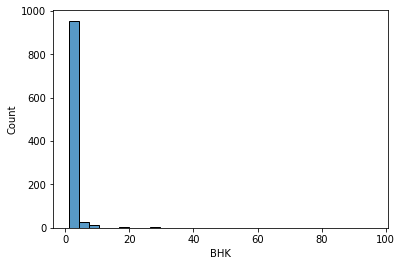

In [349]:
sns.histplot(df['BHK'], bins=30)

In [318]:
median = float(df1['BHK'].median())
df1['BHK'] = np.where(df1['BHK'] >df1['BHK'].quantile(0.99), median, df1['BHK']) #0.99 taken as quantile parameter  for outlier imputation as it is observed that it is only capturing true values.

In [319]:
df1.describe()

,BHK,Price,Area_sqft,Rate
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.627640,37.510200,1150.449000,4722.958000
std,0.988953,23.284591,642.287902,2361.270147
min,1.000000,1.000000,358.000000,145.000000
25%,2.000000,23.000000,814.000000,3200.000000
50%,3.000000,35.525000,1016.500000,3938.000000
75%,3.000000,51.170000,1337.750000,5844.000000
max,9.000000,98.340000,6500.000000,19418.000000


Removing outliers from BHK column gave us a realistic 9 BHK rather than 96 BHK which is absurd in Kolkata

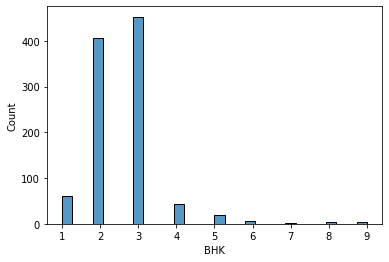

In [350]:
sns.histplot(df1['BHK'], bins=30)

In [320]:
#print(df1.loc[df1['BHK'] == 18]) #Seeing the output we saw bhk and price value which denotes that this listing does not have any BHK info so we revert back to quantile(0.97)

In [326]:
print(df1.loc[df1['BHK'] == 9])

     BHK       Locality  Price Price_unit  Area_sqft   Rate         Status
19   9.0  south dum dum    2.5         Cr       6500   3846  Ready to move
464  9.0  south dum dum    2.5         Cr       6500   3846  Ready to move
465  9.0  south dum dum    2.5         Cr       6500   3846  Ready to move
466  9.0  south dum dum    2.5         Cr       6500   3846  Ready to move
727  9.0       Baruipur    9.0         Cr       6480  13888         Resale


seeing the output we can clearly assume that the listings are legit.

Now we need to do some preprocessing for L and Cr data. Lets map them values so we can merge two columns price and price_unit

In [327]:
df1['Price_unit'].unique()

array([' L', ' Cr'], dtype=object)

In [328]:
df1['Price_unit'] = df1['Price_unit'].str.strip() #stripping white space which was causing problem in mapping data to the column
df1['Price_unit'].unique()

array(['L', 'Cr'], dtype=object)

In [329]:
df1['price_in_lakh'] =df1['Price_unit'].map({'L': '1' , 'Cr': '100'})

df1

,BHK,Locality,Price,Price_unit,Area_sqft,Rate,Status,price_in_lakh
0,2.0,New Barrakpur,21.25,L,850,2500,Ready to move,1
1,3.0,Sonarpur,74.00,L,1408,5255,Under Construction,1
2,2.0,Rajarhat,62.48,L,775,8062,Under Construction,1
3,2.0,Barasat,43.99,L,1444,3047,Ready to move,1
4,3.0,Tangra,71.51,L,1337,5348,Under Construction,1
...,...,...,...,...,...,...,...,...
995,2.0,Garia,24.00,L,720,3333,Ready to move,1
996,2.0,Garia,24.00,L,720,3333,Ready to move,1
997,2.0,Garia,25.00,L,720,3472,Ready to move,1
998,2.0,Garia,25.00,L,720,3472,Ready to move,1


In [330]:
df1.BHK = df1.BHK.astype(int) #[Returning BHK back to integer]
df1['price_in_lakh'] = df1['price_in_lakh'].astype(float)  #changing to float as string data cannot multiply with int
df1= df1.drop('Price_unit', axis=1) # as we have already mapped price_unit to price_in_lakh
df1['Price_in_lakh']= df1['Price']* df1['price_in_lakh'] # converting all prices to lakh 
df1= df1.drop('price_in_lakh', axis=1) #dropping redundant columns
df1= df1.drop('Price', axis=1)
df1 = df1[['BHK', 'Locality','Price_in_lakh','Area_sqft','Rate','Status']] #arranging
df1

,BHK,Locality,Price_in_lakh,Area_sqft,Rate,Status
0,2,New Barrakpur,21.25,850,2500,Ready to move
1,3,Sonarpur,74.00,1408,5255,Under Construction
2,2,Rajarhat,62.48,775,8062,Under Construction
3,2,Barasat,43.99,1444,3047,Ready to move
4,3,Tangra,71.51,1337,5348,Under Construction
...,...,...,...,...,...,...
995,2,Garia,24.00,720,3333,Ready to move
996,2,Garia,24.00,720,3333,Ready to move
997,2,Garia,25.00,720,3472,Ready to move
998,2,Garia,25.00,720,3472,Ready to move


Price in Lakh = Area sqft * Rate + Miscellaneous(Tax, Stamp duty etc) 

In [331]:
df1.Status.unique()

array(['Ready to move', 'Under Construction', 'Resale', 'New'],
      dtype=object)

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

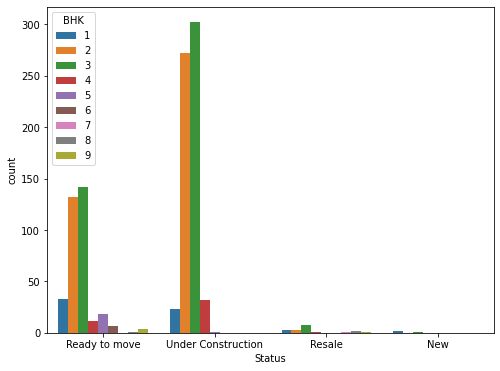

In [336]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'Status',data=df1, hue= 'BHK')

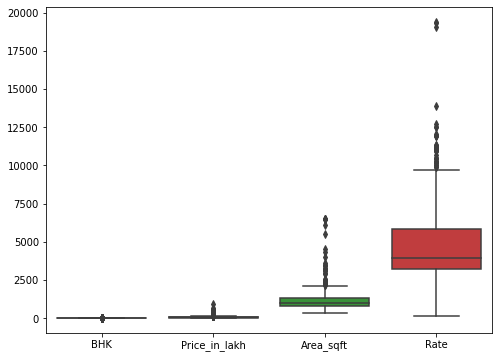

In [383]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


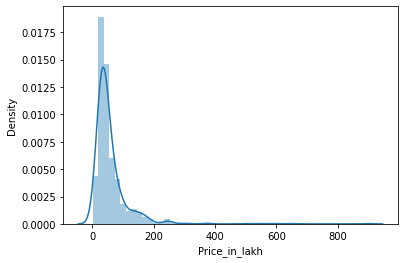

In [334]:
sns.distplot(df1['Price_in_lakh'])

**Area in SQFT wise analysis**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


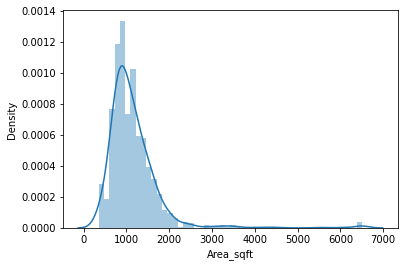

In [374]:
sns.distplot(df1['Area_sqft'])

In [375]:
plush_property= df1[df1['Area_sqft'].between(3000, 7000)]
plush_property

,BHK,Locality,Price_in_lakh,Area_sqft,Rate,Status
19,9,south dum dum,250.0,6500,3846,Ready to move
46,8,Ballygunge,500.0,4000,12500,Ready to move
55,3,Topsia,230.0,3058,7521,Ready to move
74,5,Baguiati,255.0,3600,7083,Ready to move
464,9,south dum dum,250.0,6500,3846,Ready to move
465,9,south dum dum,250.0,6500,3846,Ready to move
466,9,south dum dum,250.0,6500,3846,Ready to move
482,3,Dankuni,65.0,3240,2006,Resale
537,6,Tangra,374.0,3382,11058,Ready to move
540,3,Beniatola,150.0,4500,3333,Under Construction


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

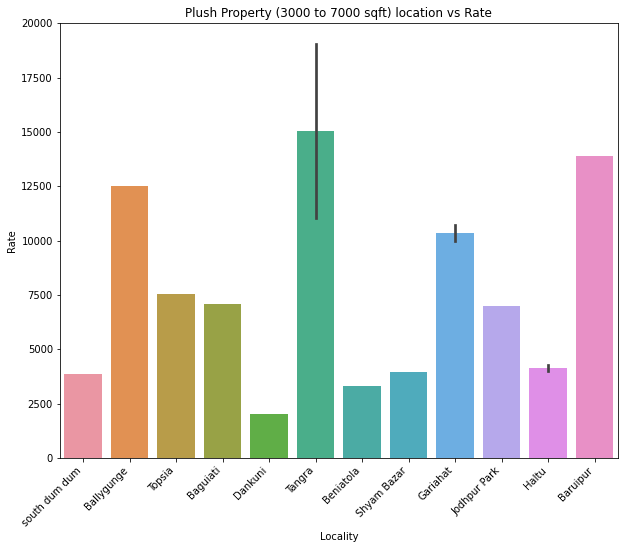

In [379]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Locality', y= 'Rate', data=plush_property)
plt.title('Plush Property (3000 to 7000 sqft) location vs Rate',fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')

Tangra, Baruipur, Ballygunge and Gariahat is costliest location for 3000- 7000 sq ft properties 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

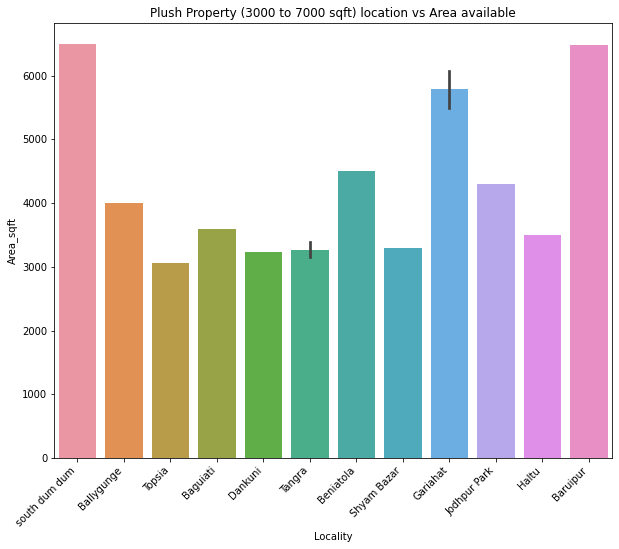

In [382]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Locality', y= 'Area_sqft', data=plush_property)
plt.title('Plush Property (3000 to 7000 sqft) location vs Area available',fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')

South Dumdum, Baruipur and Gariahat are areas with more than 5800-7000 sq ft properties 

**Rate wise analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


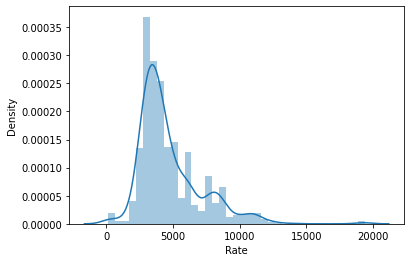

In [335]:
sns.distplot(df1['Rate'])

In [365]:
posh_area= df1[df1['Rate'].between(8000, 25000)]
posh_area

,BHK,Locality,Price_in_lakh,Area_sqft,Rate,Status
2,2,Rajarhat,62.48,775,8062,Under Construction
23,3,Rajarhat,145.00,1512,9589,Ready to move
46,8,Ballygunge,500.00,4000,12500,Ready to move
47,3,Entally,155.00,1600,9687,Ready to move
49,2,Ballygunge,65.00,750,8666,Ready to move
...,...,...,...,...,...,...
920,3,Tangra,155.00,1394,11119,Under Construction
921,3,Tangra,150.00,1358,11045,Under Construction
922,3,Tangra,165.00,1496,11029,Under Construction
923,3,Tangra,157.00,1399,11222,Under Construction


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

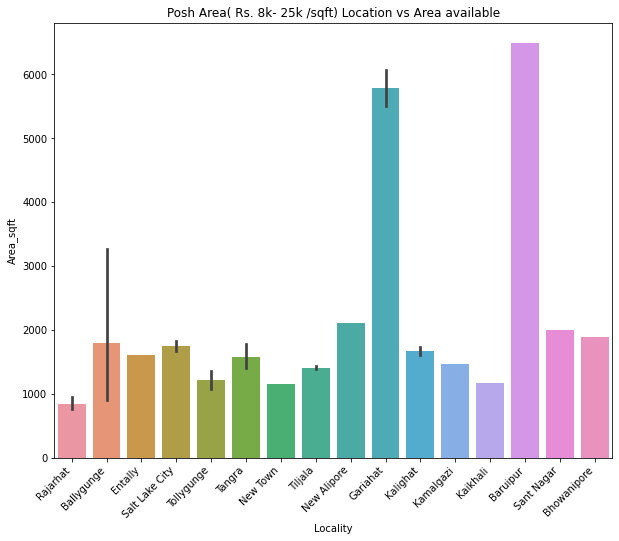

In [380]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Locality', y= 'Area_sqft', data=posh_area)
plt.title('Posh Area( Rs. 8k- 25k /sqft) Location vs Area available',fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')

Real estate available in Baruipur and Gariahat are quite large in size while rajarhat listing has lowest sq ft available which is a little surprising considering apartments are still widely available in that area. Needs further analysis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

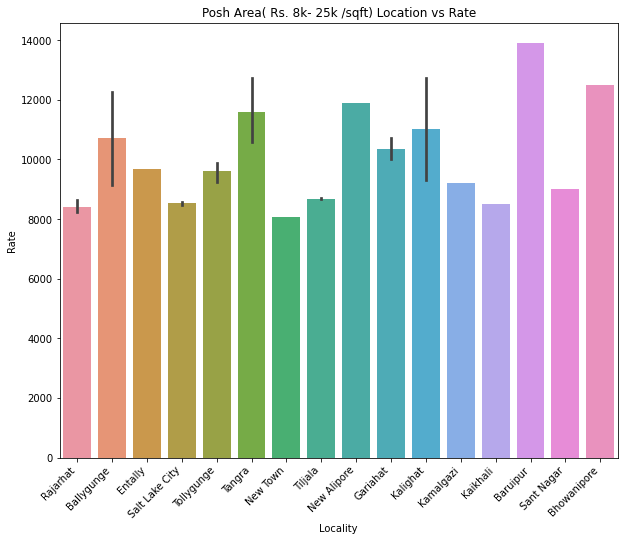

In [381]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Locality', y= 'Rate', data=posh_area)
plt.title('Posh Area( Rs. 8k- 25k /sqft) Location vs Rate',fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')

It can be seen that as per the scraped data Baruipur, Bhowanipur, New Alipore (Top 3) and then Tangra, Kalighat, Ballygunge and Gariahat has the highest rate (Rs/sqft) i.e 'posh-iest' place in Kolkata

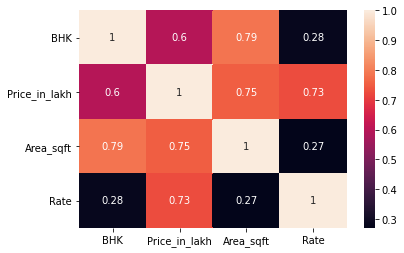

In [337]:
sns.heatmap(df1.corr(), annot =True)

As said previously Price in Lakh = Area sqft * Rate + Miscellaneous(Tax, Stamp duty etc) , so price vs area and price vs rate is a highly correlated feature so for any further complex analysis we can only keep the price to model our dataset.